# Analysis of variation of local networks

# Load the experiment 5 database

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from hpc.sdumont.s_exp_aleatory_4_lineal import v_topology

df = pd.read_csv('../9_networks_all/outputs/exp9_aleatory_linear_circle_3_9_1000/data.csv')
df.head()
print('Database Loaded')

Database Loaded


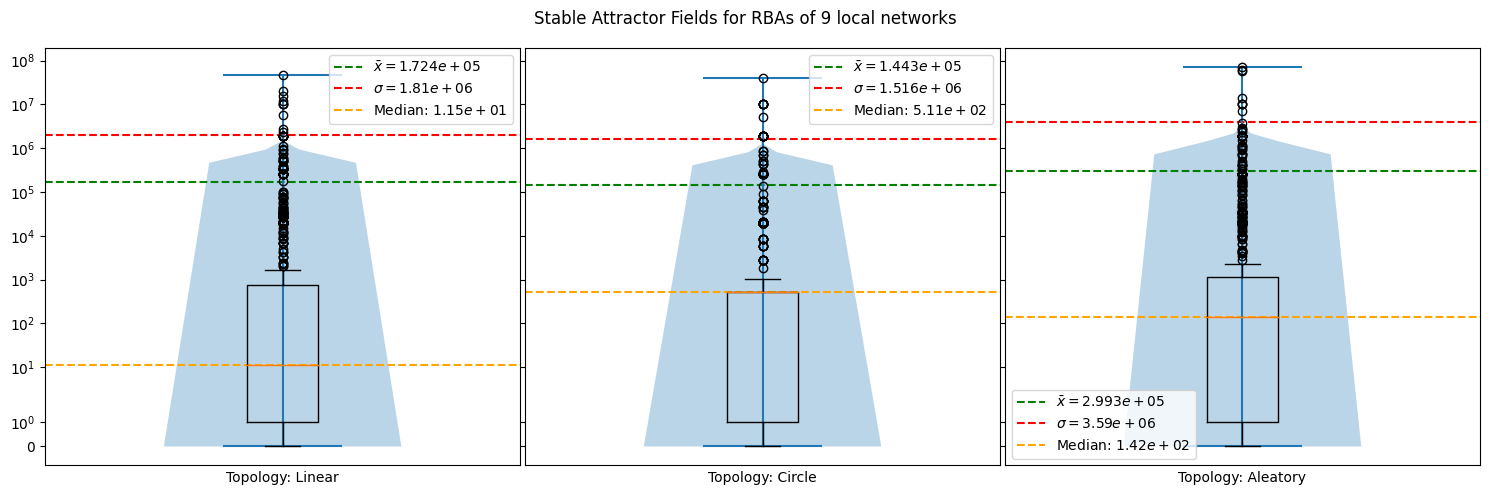

In [4]:
# Filter the data for specific topologies and local networks
l_topologies = df['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle", 2: "Aleatory"}

# Filtrar los datos para n_local_networks igual a 9
df_filtered = df[df['n_local_networks'] == 9]

# Agrupar por topología
grouped = df_filtered.groupby('v_topology')

# Crear subplots
fig, axs = plt.subplots(1, len(l_topologies), sharey=True, figsize=(15, 5))

# Si solo hay un subplot, hacer que axs sea una lista para iterar de forma uniforme
if len(l_topologies) == 1:
    axs = [axs]

# Iterar a través de las topologías y crear los gráficos
for ax, i_topology in zip(axs, l_topologies):
    group = grouped.get_group(i_topology)
    data = group['n_attractor_fields']

    # Calcular la media y la desviación estándar
    median = data.median()
    mean = data.mean()
    std_max = data.std()

    # Trazar líneas de media y desviación estándar
    ax.axhline(y=mean, xmin=0.0, xmax=1.0, color='g', ls='--',
               label=fr'$\bar{{x}}={mean:.4g}$')
    ax.axhline(y=mean + std_max, xmin=0.0, xmax=1.0, color='r', ls='--',
               label=fr'$\sigma={std_max:.4g}$')
    # Create median line (consider error bars for robustness)
    ax.axhline(y=median, xmin=0.0, xmax=1.0, color='orange', ls='--',
               label=fr'Median: ${median:.2e}$')

    # Crear gráfico de violín
    ax.violinplot(data)
    ax.boxplot(data)

    # Configurar etiquetas y límites
    ax.legend()
    ax.set_yscale('symlog')
    ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
    ax.set_xticks([])
    ax.set_xlim((0.5, 1.5))

# Establecer el título general de la figura y el layout
fig.suptitle('Stable Attractor Fields for RBAs of 9 local networks')
fig.tight_layout(w_pad=0)

# Mostrar el gráfico
plt.show()

In [12]:
# Filtrar el DataFrame por las topologías
df_linear = df_filtered[df_filtered['v_topology'] == 4]
df_circular = df_filtered[df_filtered['v_topology'] == 3]
df_random = df_filtered[df_filtered['v_topology'] == 2]

# Describir solo la columna 'n_attractor_fields' para cada topología
desc_linear = df_linear['n_attractor_fields'].describe()
desc_circular = df_circular['n_attractor_fields'].describe()
desc_random = df_random['n_attractor_fields'].describe()

# Concatenar las descripciones en una sola tabla
df_summary = pd.concat([desc_linear, desc_circular, desc_random], axis=1, keys=['Linear', 'Circular', 'Random'])

# Mostrar la tabla resumen
df_summary


,Linear,Circular,Random
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.723964e+05,1.442607e+05,2.992580e+05
std,1.810054e+06,1.515967e+06,3.589802e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.150000e+01,5.110000e+02,1.415000e+02
75%,7.680000e+02,5.130000e+02,1.152000e+03
max,4.611841e+07,4.035361e+07,7.180288e+07
